In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\kpmro\Anaconda3\envs\wae\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
N = 10  # number of pairs
silent = False
np.random.seed(4)
balls = np.array([ [i, np.random.random(), np.random.random()] for i in range(N) ])
holes = np.array([ [N + i, np.random.random(), np.random.random()] for i in range(N) ])
if not silent: 
    print('balls = {}'.format((np.transpose(balls))[:][0]))
    print('        {}'.format([ round(x[1],3) for x in balls ]))
    print('        {}'.format([ round(x[2],3) for x in balls ]))
    print('holes = {}'.format((np.transpose(holes))[:][0]))
    print('      = {}'.format([ round(x[1],3) for x in holes ]))
    print('      = {}'.format([ round(x[2],3) for x in holes ]))

balls = [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
        [0.967, 0.973, 0.698, 0.976, 0.253, 0.779, 0.863, 0.164, 0.009, 0.044]
        [0.547, 0.715, 0.216, 0.006, 0.435, 0.198, 0.983, 0.597, 0.387, 0.957]
holes = [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
      = [0.436, 0.786, 0.173, 0.601, 0.733, 0.528, 0.522, 0.158, 0.524, 0.401]
      = [0.949, 0.866, 0.075, 0.168, 0.408, 0.938, 0.108, 0.545, 0.638, 0.65]


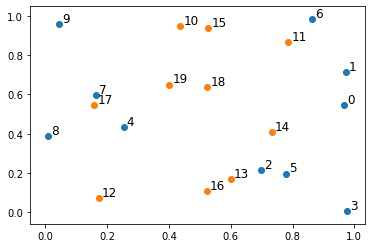

In [3]:
plt.scatter(np.transpose(balls)[:][1], np.transpose(balls)[:][2])
plt.scatter(np.transpose(holes)[:][1], np.transpose(holes)[:][2])
for i in range(N):
    plt.annotate(str(i), (np.transpose(balls)[1][i]+.01, np.transpose(balls)[2][i]+.01), fontsize=12)
    plt.annotate(str(N + i), (np.transpose(holes)[1][i]+.01, np.transpose(holes)[2][i]+.01), fontsize=12)
if not silent: plt.show()
# plt.scatter(np.transpose(balls)[:][1], np.transpose(balls)[:][2])
# plt.scatter(np.transpose(holes)[:][1], np.transpose(holes)[:][2])
# for i in range(N):
#     plt.plot([balls[i][1], holes[i][1]], [balls[i][2], holes[i][2]], c = '#4CAF50')
#     plt.annotate(str(i), (np.transpose(balls)[1][i]+.01, np.transpose(balls)[2][i]+.01), fontsize=12)
#     plt.annotate(str(i), (np.transpose(holes)[1][i]+.01, np.transpose(holes)[2][i]+.01), fontsize=12)
# if not silent: plt.show()

In [6]:
def m_line_by_mass_centers():
    balls_center = [np.mean(np.transpose(balls)[1][:]), np.mean(np.transpose(balls)[2][:])]
    if not silent: print('balls_center = [{:.2f}, {:.2f}]'.format(balls_center[0],  balls_center[1]))
    holes_center = [np.mean(np.transpose(holes)[1][:]), np.mean(np.transpose(holes)[2][:])]
    if not silent: print('holes_center = [{:.2f}, {:.2f}]'.format(holes_center[0],  holes_center[1]))
    # y = m*x + b
    m = (holes_center[1] - balls_center[1]) / (holes_center[0] - balls_center[0])
    b = holes_center[1] - m * holes_center[0] # y - m*x
    if not silent: print('y = {:.2f} * x + {:.2f}'.format(m, b))
    return [m, b]


In [4]:
def uv_coordinates(point, R_abarot):
    return R_abarot.dot(point[1:])

def change_coordinate_system(points):
    [m, b] = m_line_by_mass_centers()
    # New coordinate system
    u = np.array([1, m]) * (m ** 2 + 1) ** (-.5)
    v = np.array([-u[1], u[0]])
    if not silent: print('u = [{:.2f}, {:.2f}]\tv = [{:.2f}, {:.2f}]'.format(u[0], u[1] , v[0], v[1]))
    R = np.array(np.transpose([u, v]))
    if not silent: print('R = \n{}'.format(R))

    # inverse rotation matrix
    R_abarot = np.transpose(R)
    # R_abarot = np.linalg.inv(R)
    if not silent: print('det(R^(-1)) = {}\n'.format(np.linalg.det(R)))

    new_coordinates = np.zeros((N,3))
    for i in range(N):
        uv_point = uv_coordinates(point[i], R_abarot)
        new_coordinates[i] = np.array([points[0], uv_point[0], uv_point[1]])
    return new_coordinates

In [7]:
# def count_balls_holes(balls, holes):
# count_balls_holes:
balls_uv = change_coordinate_system(balls)
holes_uv = change_coordinate_system(holes)
if not silent: print('balls_uv = \t\t\t\tholes_uv =')
for i in range(N):
    if not silent: print('{} \t {}'.format(balls_uv[i], holes_uv[i]))
points_all = np.concatenate((balls_uv, holes_uv)) 
points_all_byX = points_all[points_all[:,1].argsort(kind='mergesort')]
points_all_byY = points_all[points_all[:,2].argsort(kind='mergesort')]
if not silent: print('\npoints_all_byX = \t\t\tpoints_all_byY =')
for i in range(2*N):
    if not silent: print('{} \t {}'.format(points_all_byX[i], points_all_byY[i]))

balls_count = np.zeros(2 * N)
holes_count = np.zeros(2 * N)
for i in range(2 * N):
    pass

balls_center = [0.57, 0.50]
holes_center = [0.49, 0.53]
y = -0.35 * x + 0.71
u = [0.94, -0.33]	v = [0.33, 0.94]
R = 
[[ 0.94307086  0.33259188]
 [-0.33259188  0.94307086]]
det(R^(-1)) = 1.0

balls_center = [0.57, 0.50]
holes_center = [0.49, 0.53]
y = -0.35 * x + 0.71
u = [0.94, -0.33]	v = [0.33, 0.94]
R = 
[[ 0.94307086  0.33259188]
 [-0.33259188  0.94307086]]
det(R^(-1)) = 1.0

balls_uv = 				holes_uv =
[0.         0.72997266 0.83770505] 	 [0.         0.09569505 1.04001167]
[1.         0.67956828 0.99762905] 	 [1.         0.45342148 1.07849118]
[2.         0.58613811 0.43584664] 	 [2.         0.13837997 0.12827524]
[3.         0.91862386 0.33057652] 	 [3.         0.51067677 0.35821182]
[4.         0.09397216 0.4941791 ] 	 [4.         0.55578436 0.62910779]
[5.         0.66926487 0.44564746] 	 [5.         0.18602674 1.05977462]
[6.         0.4867927  1.21444106] 	 [6.         0.45601217 0.27554592]
[ 7.         -0.04415357  0.61782083] 	 [ 7.         -0.03211409  0.56678855]
[ 8.      